In [ ]:
import sys
import gzip
import shutil
import os
import os
import struct
import numpy as np
import matplotlib.pyplot  as plt




# MNIST 데이터 압축해제

In [ ]:
if (sys.version_info > (3, 0)):
    writemode = 'wb'
else:
    writemode = 'w'

zipped_mnist = [f for f in os.listdir('/content') if f.endswith('ubyte.gz')]
for z in zipped_mnist:
    with gzip.GzipFile(z, mode='rb') as decompressed, open(z[:-3], writemode) as outfile:
        outfile.write(decompressed.read())

# MNIST 데이터 로드

In [ ]:
def load_mnist(path, kind='train'):
  """`path`에서 MNIST 데이터 불러오기"""
  labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
  images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
      
  with open(labels_path, 'rb') as lbpath:
      magic, n = struct.unpack('>II', lbpath.read(8))
      labels = np.fromfile(lbpath, dtype=np.uint8)

  with open(images_path, 'rb') as imgpath:
      magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
      images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
      images = ((images / 255.) - .5) * 2
  return images, labels

In [ ]:
X_train, y_train = load_mnist('/content', kind='train')
print('행: %d, 열: %d' % (X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist('/content', kind='t10k')
print('행: %d, 열: %d' % (X_test.shape[0], X_test.shape[1]))


행: 60000, 열: 784
행: 10000, 열: 784


In [ ]:
def print_image(sample_image):
  for r in range(0,28):
    for c in range(0,28):
      w = round(sample_image[r,c],2)
      print("%.2f,"%(w),end="")
    print("\n")


In [ ]:
sample_image = X_train[13].reshape((28, 28))
print(y_train[13])
np.savetxt(fname="t.csv", delimiter=",", X=sample_image)

print_image(sample_image)

6
-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,

-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,

-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.70,0.74,0.76,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,

-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.15,0.84,0.98,0.38,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,

-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.82,0.55,0.98,0.98,0.63,-0.85,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,

-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.70,0.40,0.98,0.98,-0.08,-0.49,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00

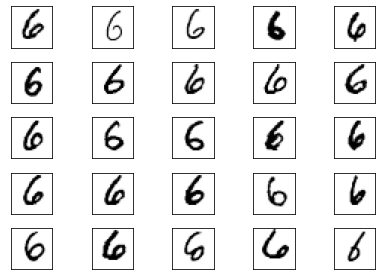

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
aa = (y_train == 6)
#print([i for i, x in enumerate(aa) if x])
for i in range(25):
  img = X_train[aa][i].reshape(28, 28)
  ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()


#인공신경망 학습 및 테스트

In [ ]:
import tensorflow as tf
np.random.seed(123)
y_train_onehot = tf.keras.utils.to_categorical(y_train)
 
print('처음 3개 레이블: ', y_train[:3])
print('\n처음 3개 레이블 (원-핫):\n', y_train_onehot[:3])


처음 3개 레이블:  [5 0 4]

처음 3개 레이블 (원-핫):
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Dense(
        units=50,    
        input_dim=X_train.shape[1],
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))

model.add(
    tf.keras.layers.Dense(
        units=50,    
        input_dim=50,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))

model.add(
    tf.keras.layers.Dense(
        units=y_train_onehot.shape[1],    
        input_dim=50,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001, decay=1e-7, momentum=.9)

model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')

history = model.fit(X_train, y_train_onehot,
                    batch_size=64, epochs=50,
                    verbose=1,
                    validation_split=0.1)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
844/844 [==============================] - 3s 2ms/step - loss: 0.8442 - val_loss: 0.3908
Epoch 2/50
844/844 [==============================] - 2s 2ms/step - loss: 0.3877 - val_loss: 0.2837
Epoch 3/50
844/844 [==============================] - 2s 2ms/step - loss: 0.3169 - val_loss: 0.2449
Epoch 4/50
844/844 [==============================] - 2s 2ms/step - loss: 0.2809 - val_loss: 0.2255
Epoch 5/50
844/844 [==============================] - 2s 2ms/step - loss: 0.2564 - val_loss: 0.2124
Epoch 6/50
844/844 [==============================] - 2s 2ms/step - loss: 0.2374 - val_loss: 0.1941
Epoch 7/50
844/844 [==============================] - 2s 2ms/step - loss: 0.2215 - val_loss: 0.1830
Epoch 8/50
844/844 [==============================] - 2s 2ms/step - loss: 0.2081 - val_loss: 0.1739
Epoch 9/50
844/844 [==============================] - 2s 2ms/step - loss: 0.1957 - val_loss: 0.1650
Epoch 10/50
844/844 [==============================] - 2s 2ms/step - loss: 0.1856 - val_loss: 0.1620

In [ ]:
predictions = model.predict_classes(X_test,  verbose=0)
correct_preds = np.sum(y_test == predictions, axis=0) 
train_acc = correct_preds / y_test.shape[0]

print('처음 3개 예측: ', predictions[:3])
print('훈련 정확도: %.2f%%' % (train_acc * 100))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


처음 3개 예측:  [7 2 1]
훈련 정확도: 96.99%


In [ ]:
print(X_train[13].reshape(-1,784).shape)
predictions = model.predict(X_train[13].reshape(-1,784), verbose=0)
np.savetxt(fname="13.csv", delimiter=",", X=X_train[13].reshape(-1,784))

print(predictions)
np.argmax(predictions)


(1, 784)
[[5.5300414e-05 1.4435931e-06 3.8718994e-05 5.8197386e-08 2.2659819e-05
  4.2543256e-06 9.9986112e-01 7.7074752e-08 1.3719504e-05 2.6464952e-06]]


6

# 실험 결과 시각화

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  #plt.imshow(img, cmap=plt.cm.binary)
  plt.imshow(img.reshape(28, 28), cmap='Greys')

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)


In [ ]:

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


NameError: ignored

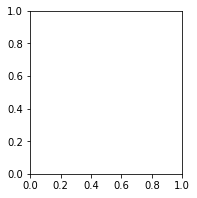

In [ ]:

i = 555
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()


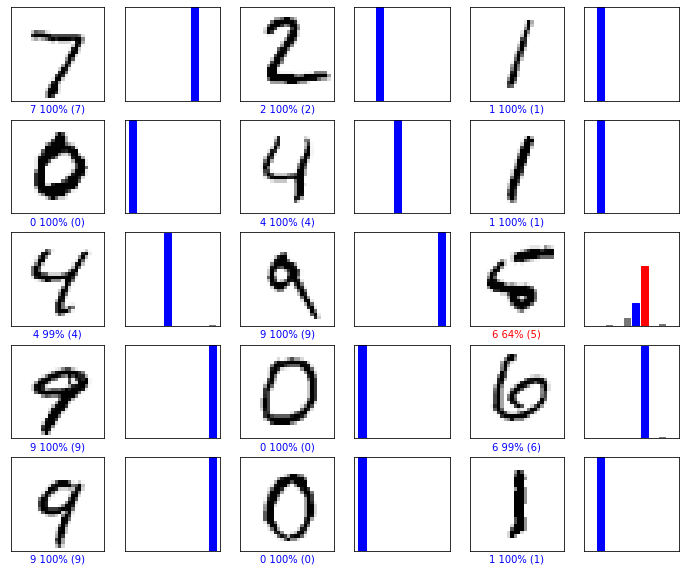

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()


In [ ]:
def plot_value_array2(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[0], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [ ]:
img_index = 2582

img = X_test[img_index]
plt.imshow(img.reshape(28, 28), cmap='Greys')
plt.show()

img = (np.expand_dims(img,0))
predictions_single = model.predict(img)

print(predictions_single)
np.argmax(predictions_single)

plot_value_array2(img_index, predictions_single, y_test)


# 그림판으로 만든 이미지 식별

이미지 데이터를 화면에 보기좋게 출력하는 함수

In [ ]:
def print_image(sample_image):
  for r in range(0,28):
    for c in range(0,28):
      w = round(sample_image[r,c],2)
      print("%.2f,"%(w),end="")
    print("\n")


MNIST 이미지와 그림판 이미지의 히스토그램 비교

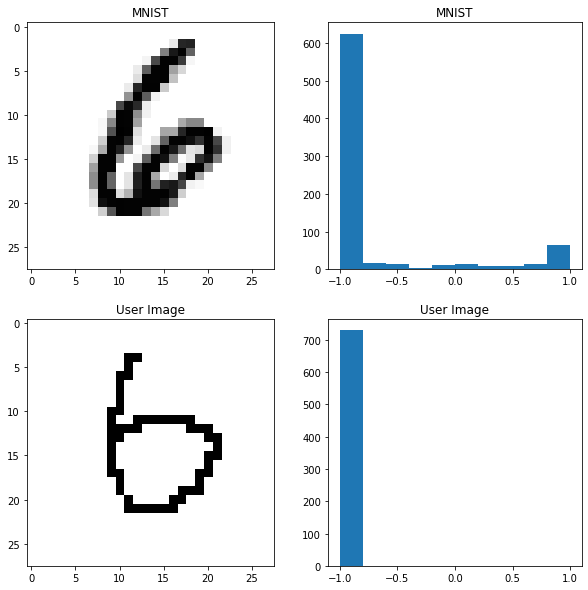

In [ ]:
import cv2

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(X_train[13].reshape(28,28), vmin=-1, vmax=1, cmap='Greys')
plt.title("MNIST")


plt.subplot(222)
plt.hist(X_train[13], bins=np.arange(-1, 1.1, 0.2))
plt.title("MNIST")


plt.subplot(223)
user_img = cv2.imread('/content/2.png', cv2.IMREAD_GRAYSCALE)
user_img = cv2.resize(user_img,(28,28))
user_img = ( (255 -   user_img)/255.0  - 0.5) *2
plt.imshow(user_img, vmin= -1, vmax=1, cmap='Greys')
plt.title("User Image")


plt.subplot(224)
plt.hist(user_img.flatten(), bins=np.arange(-1, 1.1, 0.2))
plt.title("User Image")
plt.show()

#(thresh, gray) = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#gray = cv2.GaussianBlur(gray,(3,3),1)
#(thresh, gray) = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#np.savetxt(fname="t1.csv", delimiter=",", X=test_num)



In [ ]:
test_num = X_train[13].reshape(-1,784)
print(test_num.shape)
predictions = model.predict(test_num)
print(predictions)
print(np.argmax(predictions))


test_num = user_img.reshape(-1,784)
print(test_num.shape)
predictions = model.predict(test_num)
print(predictions)
print(np.argmax(predictions))

(1, 784)
[[5.5300414e-05 1.4435931e-06 3.8718994e-05 5.8197386e-08 2.2659819e-05
  4.2543256e-06 9.9986112e-01 7.7074752e-08 1.3719504e-05 2.6464952e-06]]
6
(1, 784)
[[6.2699161e-02 1.3883541e-04 2.3010150e-05 7.8814465e-04 1.5996312e-03
  7.7038532e-01 1.6089700e-01 1.8944464e-03 9.7979978e-04 5.9465307e-04]]
5


# CNN 기반 인공신경망 모델 학습

In [ ]:
X_train_cnn = X_train.reshape(-1,28,28,1)
X_test_cnn = X_test.reshape(-1,28,28,1)


model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(64, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))
model_cnn.summary()


sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001, decay=1e-7, momentum=.9)

model_cnn.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')

history = model_cnn.fit(X_train_cnn, y_train_onehot,
                    batch_size=64, epochs=50,
                    verbose=1,
                    validation_split=0.1)
predictions = model_cnn.predict_classes(X_test_cnn,  verbose=0)
correct_preds = np.sum(y_test == predictions, axis=0) 
train_acc = correct_preds / y_test.shape[0]

print('처음 3개 예측: ', predictions[:3])
print('훈련 정확도: %.2f%%' % (train_acc * 100))


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


844/844 [==============================] - 49s 57ms/step - loss: 0.8150 - val_loss: 0.1881
Epoch 2/50
844/844 [==============================] - 48s 57ms/step - loss: 0.1730 - val_loss: 0.1098
Epoch 3/50
844/844 [==============================] - 48s 57ms/step - loss: 0.1145 - val_loss: 0.0834
Epoch 4/50
844/844 [==============================] - 48s 57ms/step - loss: 0.0906 - val_loss: 0.0749
Epoch 5/50
844/844 [==============================] - 48s 57ms/step - loss: 0.0765 - val_loss: 0.0638
Epoch 6/50
844/844 [==============================] - 48s 57ms/step - loss: 0.0669 - val_loss: 0.0582
Epoch 7/50
844/844 [==============================] - 48s 57ms/step - loss: 0.0597 - val_loss: 0.0537
Epoch 8/50
844/844 [==============================] - 47s 56ms/step - loss: 0.0553 - val_loss: 0.0522
Epoch 9/50
844/844 [==============================] - 48s 57ms/step - loss: 0.0500 - val_loss: 0.0491
Epoch 10/50
844/844 [==============================] - 48s 57ms/step - loss: 0.0465 - val_los

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


처음 3개 예측:  [7 2 1]
훈련 정확도: 99.01%


In [ ]:
model_cnn.save("mnist_cnn.h5")

In [ ]:
model_cnn = tf.keras.models.load_model("mnist_cnn.h5")

In [ ]:
test_num = X_train[13].reshape(-1,28,28,1)
print(test_num.shape)
predictions = model_cnn.predict(test_num)
print(predictions)
print(np.argmax(predictions))


test_num = user_img.reshape(-1,28,28,1)
print(test_num.shape)
predictions = model_cnn.predict(test_num)
print(predictions)
print(np.argmax(predictions))



(1, 28, 28, 1)
[[2.7578467e-11 1.9503898e-16 9.4467094e-15 2.0117946e-13 1.0698840e-12
  8.9273441e-12 1.0000000e+00 1.9933218e-18 9.9278177e-09 7.8410738e-15]]
6
(1, 28, 28, 1)
[[2.7578467e-11 1.9503898e-16 9.4467094e-15 2.0117946e-13 1.0698840e-12
  8.9273441e-12 1.0000000e+00 1.9933218e-18 9.9278177e-09 7.8410738e-15]]
6
